In [3]:
%matplotlib inline
import sys
sys.path.insert(0,'..')
from IPython.display import HTML,Image,SVG,YouTubeVideo
from helpers import header

HTML(header())

# Histogram based segmentation

All the pixels in the image are processed the same way.

* common method
* easy and fast
* used when pixel value has a direct interpretation 

e.g. Hounsfield Unit in CT scan
$$HU = 1000\times\frac{\mu - \mu_{water}}{\mu_{water} - \mu_{air}}$$

Imaging: Substance densities in Hounsfield Units (Radiodensity)

    Air: -1000
    Lung: -700
    Soft Tissue: -300 to -100
    Fat: -50
    Water: 0
    CSF: +15
    Blood: +30 to +45
    Muscle: +40
    Calculus: +100 to +400
    Bone: +1000 (up to +3000 for dense bone)

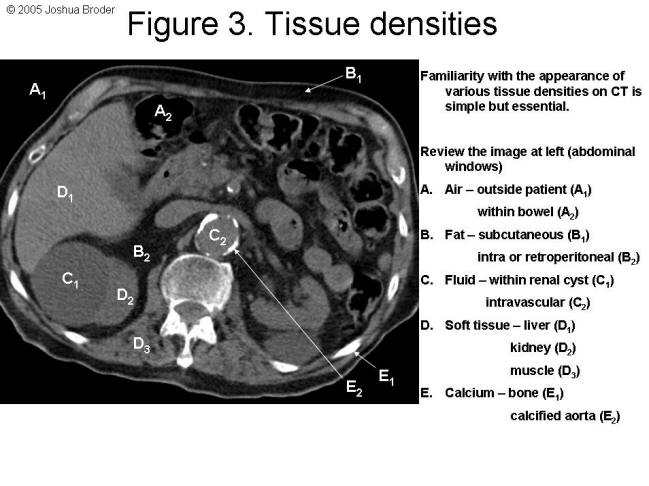

In [5]:
Image('http://crashingpatient.com/wp-content/images/part1/tissuedensities.jpg')

a problem can arise when:
* the illumination is uneven
* in presence of shadows
* when the object of interest has a variable brightness or texture, etc

## Image threshold

definition

$$\begin{align*} 
g(i,j) &= 1 \, \text{if} \, f(i,j)>T \\
\,  &= 0 \, \text{otherwise}
\end{align*}$$

$T$ can be:
* fixed: $T = T0$
* globally adaptive: $T = T(f)$
* locally adaptive: $T = T(f,fc)$

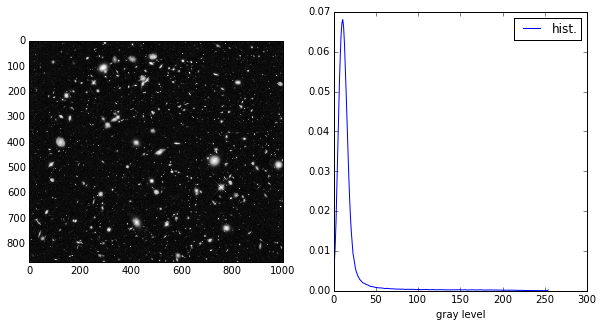

In [23]:
from skimage import data
import matplotlib.pyplot as plt
import numpy as np

def norm_hist(ima):
    hist,bins = np.histogram(ima.flatten(),range(256))  # histogram is computed on a 1D distribution --> flatten()
    return 1.*hist/np.sum(hist) # normalized histogram

def display_hist(ima):
    plt.figure(figsize=[10,5])
    if ima.ndim == 2:
        nh = norm_hist(ima)
    else:
        nh_r = norm_hist(ima[:,:,0])
        nh_g = norm_hist(ima[:,:,1])
        nh_b = norm_hist(ima[:,:,2])
    # display the results
    plt.subplot(1,2,1)
    plt.imshow(ima,cmap=plt.cm.gray)
    plt.subplot(1,2,2)
    if ima.ndim == 2:
        plt.plot(nh,label='hist.')
    else:
        plt.plot(nh_r,color='r',label='r')
        plt.plot(nh_g,color='g',label='g')
        plt.plot(nh_b,color='b',label='b')
    plt.legend()
    plt.xlabel('gray level');

display_hist(data.hubble_deep_field()[:,:,0])


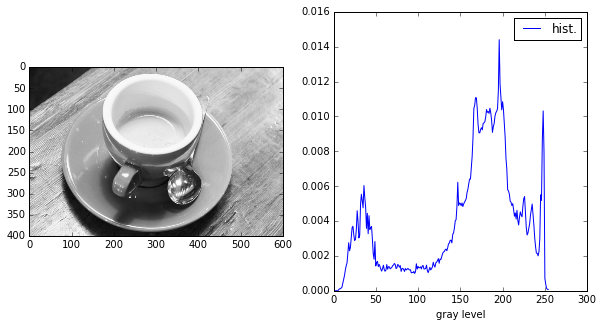

In [24]:
display_hist(data.coffee()[:,:,0])


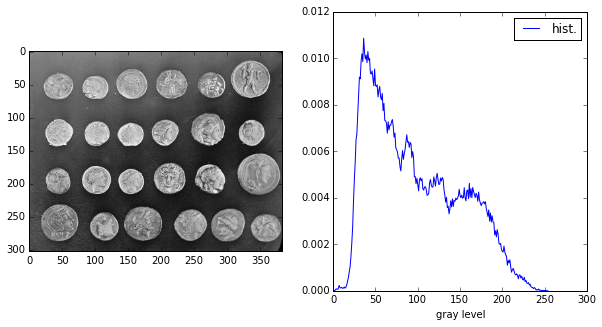

In [13]:
display_hist(data.coins())


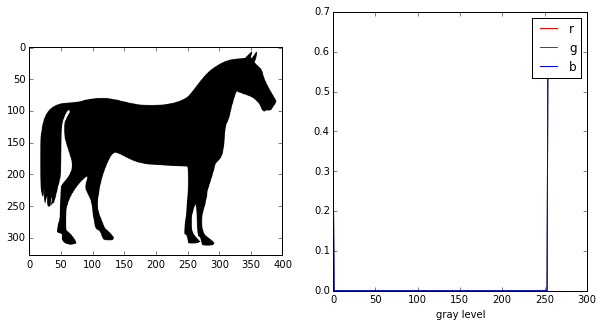

In [17]:
display_hist(data.horse())


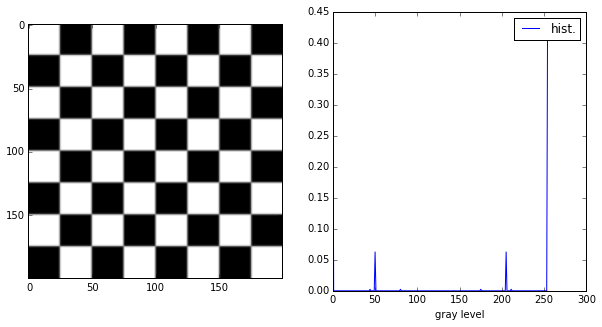

In [16]:
    display_hist(data.checkerboard())


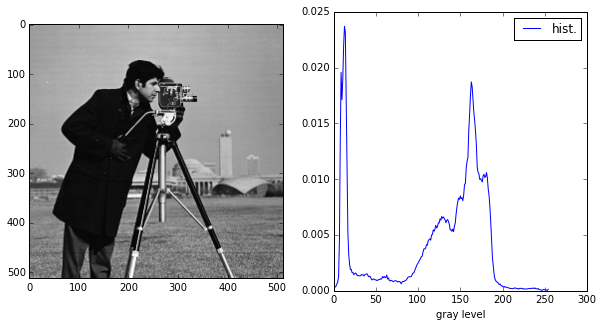

In [18]:
display_hist(data.camera())


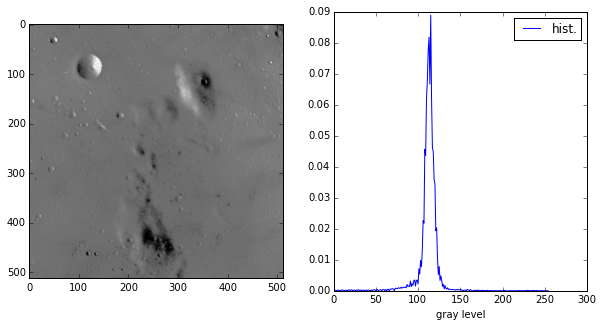

In [20]:
display_hist(data.moon())


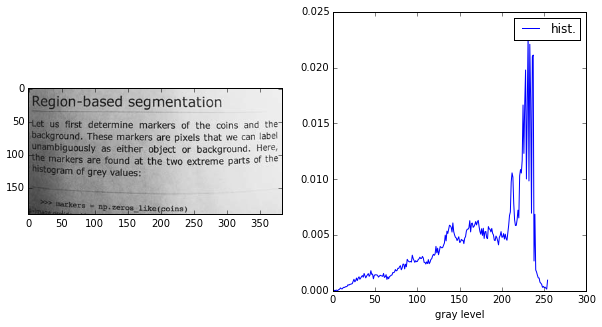

In [21]:
display_hist(data.page())


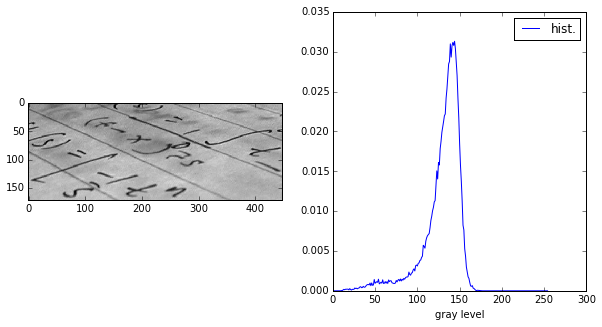

In [22]:
display_hist(data.text())
